In [1]:
# 🌟 Multi-Class Classification
# Multi-Class Classification is a type of Supervised Machine Learning used when the problem requires assigning an input data point to one of three or more discrete categories. It is an extension of Binary Classification, which only handles two classes.

# Core Concept :The goal is still to learn decision boundaries in the feature space, but instead of one boundary separating two classes, the model must define multiple boundaries to separate all N classes. When presented with a new input, the model outputs a predicted class label, which is one of the N possible categories.
# The mathematical approach often used by algorithms like Logistic Regression and Support Vector Machines (SVMs) to handle multi-class problems is:
# One-vs-Rest (OvR) or One-vs-All (OvA): This strategy trains N separate binary classifiers, where N is the number of classes. Each classifier is trained to distinguish one class from all the other classes combined. For a new input, all N classifiers make a prediction, and the one with the highest confidence score wins.
# One-vs-One (OvO): This trains {N(N-1)}/2 binary classifiers, one for every unique pair of classes. For a new input, the class that receives the most "votes" from the binary classifiers is chosen.

In [2]:
# This example uses the popular Iris dataset, a classic benchmark in machine learning, to classify flower samples into one of three species: Setosa, Versicolor, or Virginica. We will use the K-Nearest Neighbors (KNN) algorithm, which naturally supports multi-class classification.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [4]:
# --- 1. Load and Prepare Multi-Class Data ---
# Load the Iris dataset, which has 3 classes (0, 1, 2)
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)  # Features
y = iris.target  # Target classes (0, 1, 2)

# Select only two features for easier visualization: Petal Length and Petal Width
X_2d = X[["petal length (cm)", "petal width (cm)"]]
target_names = iris.target_names  # ['setosa', 'versicolor', 'virginica']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_2d, y, test_size=0.3, random_state=42
)

In [5]:
# --- 2. Train the Model ---
# K-Nearest Neighbors (KNN) is an effective classifier for this task
model = KNeighborsClassifier(
    n_neighbors=5
)  # K=5 is the number of nearest neighbors to check

# Train the model
model.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [6]:
# --- 3. Make Predictions ---
y_pred = model.predict(X_test)

In [7]:
# --- 4. Evaluate the Model ---
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(pd.DataFrame(conf_matrix, index=target_names, columns=target_names))

Model Accuracy: 1.0000

Confusion Matrix:
            setosa  versicolor  virginica
setosa          19           0          0
versicolor       0          13          0
virginica        0           0         13


In [8]:
# --- 5. Example Prediction ---
# Predict the species for a new flower with (Petal Length=4.5cm, Petal Width=1.5cm)
# Use a DataFrame with the same column names used during training to avoid sklearn warnings
new_flower = pd.DataFrame([[4.5, 1.5]], columns=X_2d.columns)
prediction_class = model.predict(new_flower)[0]
predicted_species = target_names[prediction_class]

print(
    f"New Flower Prediction (4.5cm, 1.5cm): Class {prediction_class} ({predicted_species})"
)

New Flower Prediction (4.5cm, 1.5cm): Class 1 (versicolor)


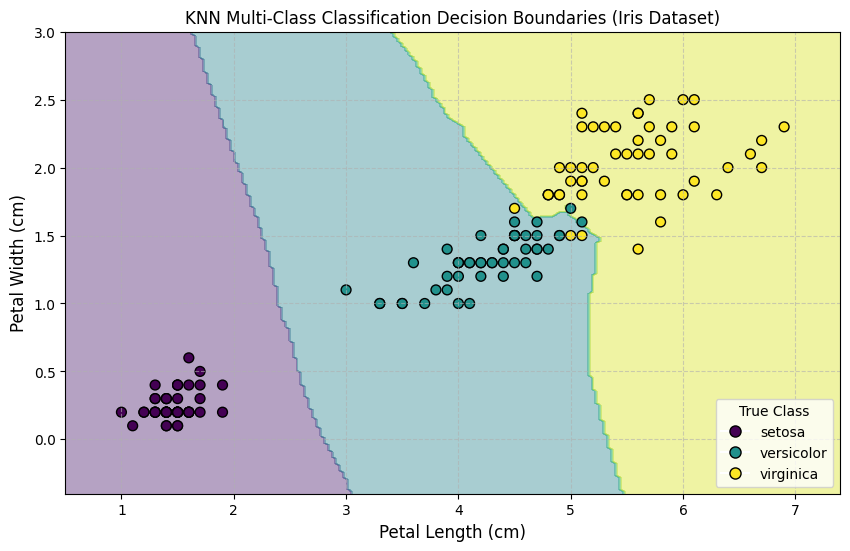

In [9]:
# The following code continues from the previous block using the trained 'model', 'X_2d', and 'y'

# Define the range for each feature with a small margin
pl_min, pl_max = X_2d.iloc[:, 0].min() - 0.5, X_2d.iloc[:, 0].max() + 0.5
pw_min, pw_max = X_2d.iloc[:, 1].min() - 0.5, X_2d.iloc[:, 1].max() + 0.5

# Create a grid of points (e.g., 200x200)
xx, yy = np.meshgrid(np.linspace(pl_min, pl_max, 200), np.linspace(pw_min, pw_max, 200))

# Predict classes for the entire grid
Z_input = np.c_[xx.ravel(), yy.ravel()]
# Convert grid to DataFrame with the same feature names used in training to avoid sklearn warnings
Z_input_df = pd.DataFrame(Z_input, columns=X_2d.columns)
Z = model.predict(Z_input_df)
Z = Z.reshape(xx.shape)

# Visualize the Multi-Class Boundaries and Data Points
plt.figure(figsize=(10, 6))

# Plot the colored regions (the three decision regions)
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.viridis)

# Plot the actual data points, colored by their true class
scatter = plt.scatter(
    X_2d.iloc[:, 0], X_2d.iloc[:, 1], c=y, edgecolors="k", cmap=plt.cm.viridis, s=50
)

# Create a robust legend for the classes using proxy handles

n_classes = len(np.unique(y))
cmap = plt.cm.viridis
colors = cmap(np.linspace(0, 1, n_classes))
handles = [
    Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        markerfacecolor=colors[i],
        markeredgecolor="k",
        markersize=8,
    )
    for i in range(n_classes)
]
plt.legend(
    handles=handles, labels=list(target_names), title="True Class", loc="lower right"
)

plt.xlabel("Petal Length (cm)", fontsize=12)
plt.ylabel("Petal Width (cm)", fontsize=12)
plt.title("KNN Multi-Class Classification Decision Boundaries (Iris Dataset)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()